# Investigaing Titanic Dataset 
#### Author: [Abdulaziz Alhaqbani] 

#### Author: [Abdulaziz Alhaqbani]

This report explores a dataset of Titanic's passengers and crew (891 of 2224 total people aboard) including various information such as name, age, and ticket class. A number of questions this report propose to identify potential factors that might correlate with survivorships. Then an exploratory data analysis will be conducted to answer the questions, followed by multiple visualizations to communicate meaningful findings.


The dataset was retrivied from Kaggle website. [Kaggle: Titanic Page](https://www.kaggle.com/c/titanic/data)

First, we will import necessary libraries such as NumPy and Pandas to deal with the dataset conveniently, and load the dataset into a DataFrame variable.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import random 
pd.options.mode.chained_assignment = None  
filename = 'titanic-data.csv'
titanic_data = pd.read_csv(filename)

Populating the interactive namespace from numpy and matplotlib


In [92]:
titanic_data.head() #Showing the first few rows of the dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
print "Dataset Info:\n"
titanic_data.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Wrangling

We will look into the dataset's structure and see if there are any issues that seek corrections.

In [94]:
titanic_data.count() #see how many records in each fields.

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

891 is the expected number of records for each field since the original dataset contains records 891 people aboard the Titanic. 
However, **Age**, **Cabin**, **Embarked** fields showed different numbers that were most likely caused by missing values.


Missing values in **Age** & **Embarked** fields will be replaced with statistical measurements whereas the **Cabin** field will be dropped since only a quarter of it is known, and there is no way to approximate the missing values logically nor statistically.

In [95]:
titanic_data[['Embarked','Age','Cabin']].isnull().sum() #see how many missing values in these fields

Embarked      2
Age         177
Cabin       687
dtype: int64

In [96]:
embarked_mode = titanic_data['Embarked'].mode()[0] #Mode of Embarked field
titanic_data['Embarked'].fillna(embarked_mode,inplace=True)#replace missing values of Embarked with the mode.

titanic_data.drop('Cabin',axis=1,inplace=True) #removal of Cabin field

Descriptive Statistics for the passengers Age:


count    891.000000
mean      29.296487
std       13.526432
min        0.420000
25%       20.250000
50%       28.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

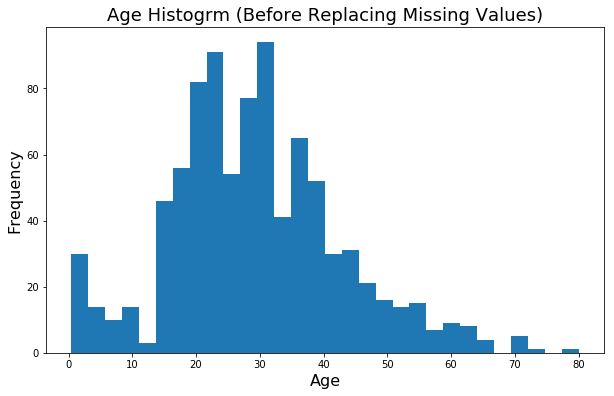

In [132]:
plt.figure(figsize=(10, 6))
plt.hist(titanic_data['Age'].dropna(),bins=30)#plotting a histogram for Age field to see an overview
plt.title('Age Histogrm (Before Replacing Missing Values)',fontsize = 18)
plt.xlabel('Age',fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
print ('Descriptive Statistics for the passengers Age:')
titanic_data['Age'].describe() #descriptive statistical measurements for Age field


#### Replacing NA values with random numbers between the range:  ( μ + σ, μ - σ)
In order to replace the NaN values in the Age field, we will replace them with random numbers using **NumPy** Random module where the boundaries will be one standard deviation above & below the mean.
   

Descriptive Statistics for the passengers Age(After Replacing Missing Values):


count    891.000000
mean      29.296487
std       13.526432
min        0.420000
25%       20.250000
50%       28.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

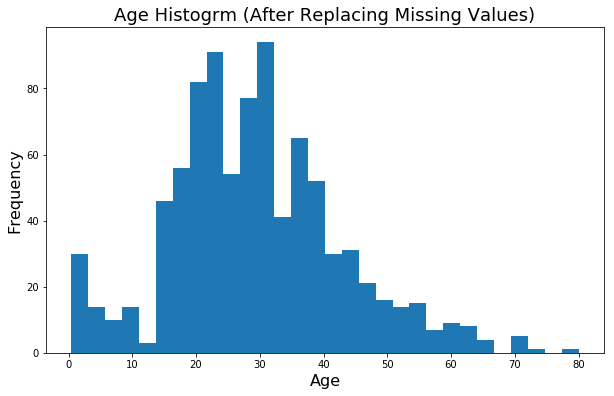

In [134]:
#assignment of Age's mean and std into respective variables
age_mean,age_std = titanic_data['Age'].mean(),titanic_data['Age'].std()

#return a Series of boolen where True means NaN value in Age field.
index_of_NaN_age = titanic_data['Age'].apply(math.isnan) 

#assingment of random number to replace NaN values in Age field:
titanic_data['Age'][index_of_NaN_age] = np.random.randint(int(age_mean-age_std),int(age_mean+age_std),size = index_of_NaN_age.count())
#titanic_data.Age[index_of_NaN_age]
#plotting Age field after filling out the missing values
plt.figure(figsize=(10, 6))
plt.hist(titanic_data['Age'],bins=30)
plt.xlabel('Age',fontsize = 16)
plt.ylabel('Frequency',fontsize = 16)
plt.title('Age Histogrm (After Replacing Missing Values)',fontsize = 18)
print ('Descriptive Statistics for the passengers Age(After Replacing Missing Values):')
titanic_data['Age'].describe()


We can see almost a normal distribuation (bell-shaped) for both genders' ages as the graphs below depict:

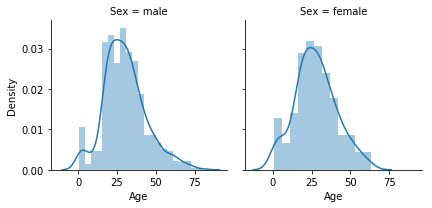

In [125]:
plot = sns.FacetGrid(titanic_data, col="Sex")  
plot.map(sns.distplot, "Age")  
plot.set_ylabels ("Density")

Since the dataset has divided family members into two fields **Parch** & **SibSp**, we will create an aggregated field named **FamilyAbroad** that sums the total number of family members abroad the Titanic.

Also, we will create a boolean field named **Child** to be *True* if he/she is younger than 15.

In [100]:
#sums the total number of relatives abroad
titanic_data['FamilyAbroad'] = titanic_data['Parch'] + titanic_data['SibSp']

#this function is for identifying children from the dataset 
def isChild(age):
    return True if age < 15 else False

titanic_data['Child'] = titanic_data['Age'].apply(isChild)
display(titanic_data.head())#checking the data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyAbroad,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,False


In [101]:
print "Missing data points (after wrangling the dataset):"
display (titanic_data.isnull().sum())

Missing data points (after wrangling the dataset):


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
FamilyAbroad    0
Child           0
dtype: int64

## Exploratory Data Analysis

In this section, we will dive into the Titanic's dataset and see if we can attentively answer the following questions:

- Did the socio-economic status **Pclass** correlate with survival conditions by any mean?
- Did both genders survive equally? 
- Was age a factor in their survivability? 
- How about survival rate for children and elderly?
- Was the family size affecting of the survival rate? how about those who travelled without their families?
- Was there any embarkment location whose passengers had higher rate of survive against others ?


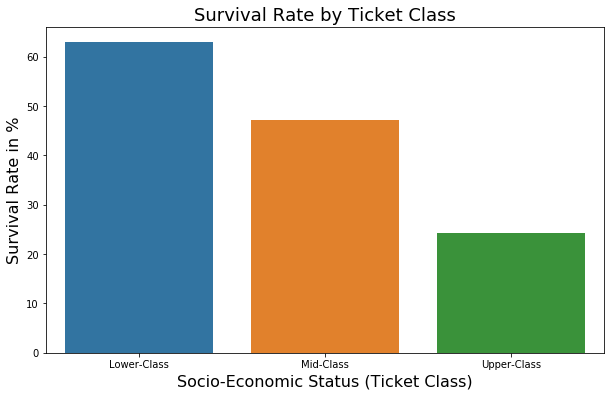

In [121]:
#group the titanic dataset by Pclass and take the mean of Survived field.
grouped_by_pclass = titanic_data.groupby(['Pclass'],as_index=False)
grouped_by_pclass_survived =  grouped_by_pclass['Survived'].mean()
#Renaming Pclass values to be more self-explanatory.
grouped_by_pclass_survived['Pclass'] = ['Lower-Class','Mid-Class','Upper-Class']
#muliply the Survived field by 100 to reflect % in the gragh below
grouped_by_pclass_survived['Survived'] = grouped_by_pclass_survived['Survived'].mul(100)

#setting up the chart by using Seaborn
fig = plt.subplots(figsize=(10, 6))
p = sns.barplot(x="Pclass", y="Survived", data=grouped_by_pclass_survived)

# set options on the chart
p.set_xlabel('Socio-Economic Status (Ticket Class)', fontsize=16)
p.set_ylabel('Survival Rate in %', fontsize=16)
p.set_title("Survival Rate by Ticket Class", fontsize=18)

We see that the lower-class had much higher mean of survival, it could be worthy to investigate if the location of upper-class was greatly impacted by the iceberg's collision ?

Age could be a factor for the survivability of Titanic's passengers, the boxplot below shets the light and gives insights into the stated assumption:

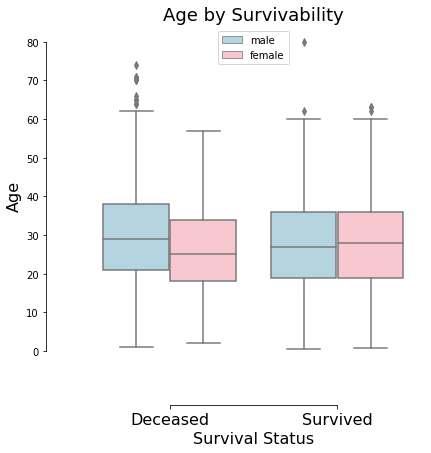

In [135]:
gender_color = {}
for sex in titanic_data.Sex.unique():
    if sex == 'male':
        gender_color[sex] = "lightblue"
    else:
        gender_color[sex] = "pink"

g = sns.boxplot(x="Survived", y="Age", hue="Sex", palette=gender_color, data=titanic_data)
sns.despine(offset=40, trim=True)
plt.legend(loc=9)

labels = ['Deceased','Survived']
plt.subplots_adjust(top=1.3)
g.set_ylabel('Age', fontsize=16)
g.set_xlabel('Survival Status', fontsize=16)
g.set_xticklabels(labels, fontsize=16)
title('Age by Survivability', fontsize=18)
plt.show()

The medians of the survived passengers for both genders are almost equal, whereas the medians of the deceased varied for both genders. 

Now let us see see if males/females had roughly equal chances of survival.

In [104]:
titanic_data['Sex'].value_counts()#see how many males/females in the dataset

male      577
female    314
Name: Sex, dtype: int64

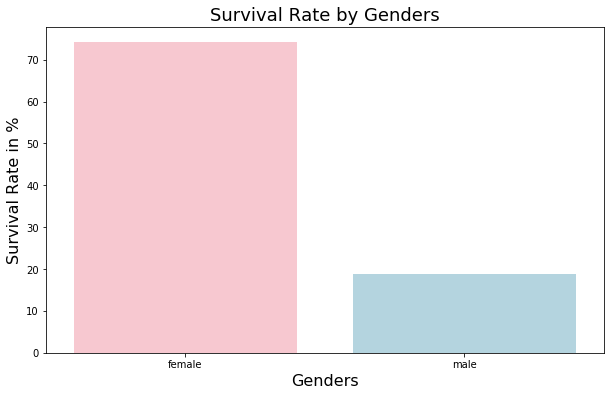

In [117]:
#plotting a gragh to depict the survival mean for both genders
grouped_by_sex = titanic_data.groupby(['Sex'],as_index=False)['Survived'].mean()
#muliply the Survived field by 100 to reflect % in the gragh below
grouped_by_sex['Survived'] = grouped_by_sex['Survived'].mul(100)

plt.figure(figsize=(10, 6))
p = sns.barplot(x="Sex", y="Survived",palette =gender_color, data=grouped_by_sex)
p.set_title("Survival Rate by Genders", fontsize=18)
p.set_xlabel('Genders', fontsize=16)
p.set_ylabel('Survival Rate in %', fontsize=16)


Although the male passengers outnumbered the female ones, it seems that the survival mean of females is notably higher. The reason could be related to the priority of getting on the lifeboats, where typically females are the first to get on.

It is intriguing to do the same graph but only for children under the age of 15. Let us find out.

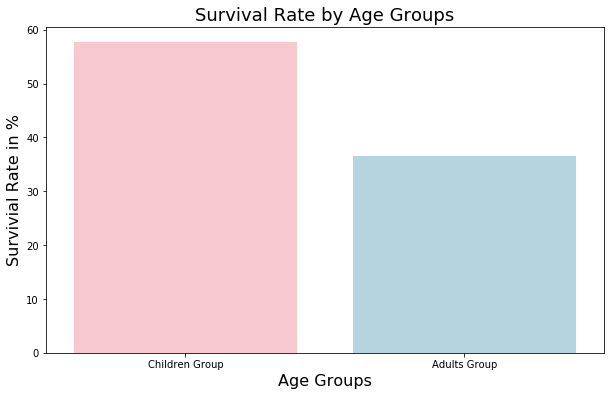

In [116]:
#making a Pandas dataframe of Titanic dataset and make it grouped by 'Chiled' 
group_by_children_field = titanic_data.groupby(['Child'],as_index=False)['Survived'].mean()*100
#rename the values of Child fields as follows:  Children Group if True, and Adults Group if False.
group_by_children_field['Child'] = 'Adults Group' , 'Children Group'
group_color = {}
for group in group_by_children_field.Child.unique():
    if group == 'Adults Group':
        group_color[group] = "lightblue"
    else:
        group_color[group] = "pink"
        
#plotting
plt.figure(figsize=(10, 6))
p = sns.barplot(x="Child", y="Survived", data=group_by_children_field,palette =group_color, order = ['Children Group','Adults Group'])
p.set_title("Survival Rate by Age Groups", fontsize=18)
p.set_xlabel('Age Groups', fontsize=16)
p.set_ylabel('Survivial Rate in %', fontsize=16)

#only_children = titanic_data[titanic_data['Child'] == True].groupby(['Child'],as_index=False)['Survived'].mean()
#only_adults = titanic_data[titanic_data['Child'] == False].groupby(['Child'],as_index=False)['Survived'].mean()


As expected, children had a higher chance of survival than adults, probably because there were given priority into the lifeboats.

How about looking deeper into the elderly segment for both genders whose age is above 50 years old.

C:\Users\Abdulaziz\Anaconda3\envs\python2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Abdulaziz\Anaconda3\envs\python2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


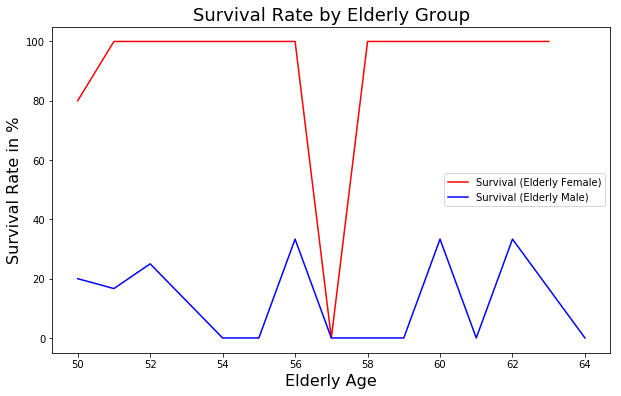

In [107]:
#making two Pandas dataframe as subset from the original one but only passengers within age (50 to 65), each dataframe represent a gender.
#we did not include outlier elderly age (>65) as female's max age is less than male's.
elderly_male_grouped = titanic_data[titanic_data['Age'].isin(range(50,65))][titanic_data['Sex']=='male'].groupby(['Age'],as_index=False)
elderly_female_grouped = titanic_data[titanic_data['Age'].isin(range(50,65))][titanic_data['Sex']=='female'].groupby(['Age'],as_index=False)

#plotting the line graph for both genders
plt.figure(figsize=(10, 6))
plt.plot(elderly_female_grouped.mean()['Age'],elderly_female_grouped.mean()['Survived']*100,c='red',label='Survival (Elderly Female)')
plt.plot(elderly_male_grouped.mean()['Age'],elderly_male_grouped.mean()['Survived']*100,c='blue',label='Survival (Elderly Male)')

#setting up labels and title
plt.legend(loc='center right')
plt.xlabel('Elderly Age',fontsize= 16)
plt.ylabel('Survival Rate in %',fontsize= 16)
plt.title('Survival Rate by Elderly Group',fontsize= 18)



Notable difference between the survivals among the elderly groups. Again, this is probably because females were given priority into the lifeboats. 

Earlier we created a field named: **FamilyAbroad** that sums the number of a passenger's family members travelling with him/her. It would be interesting to see if the family size had a correlation with the survivability. 

The table below shows the survival percentage of each family group followed by a histogram to show the actual count number for each mentioned group:

,FamilyAbroad,Count,Percentage
0,0,537,60.269360
1,1,161,18.069585
2,2,102,11.447811
3,3,29,3.254770
4,4,15,1.683502
5,5,22,2.469136
6,6,12,1.346801
7,7,6,0.673401
8,10,7,0.785634


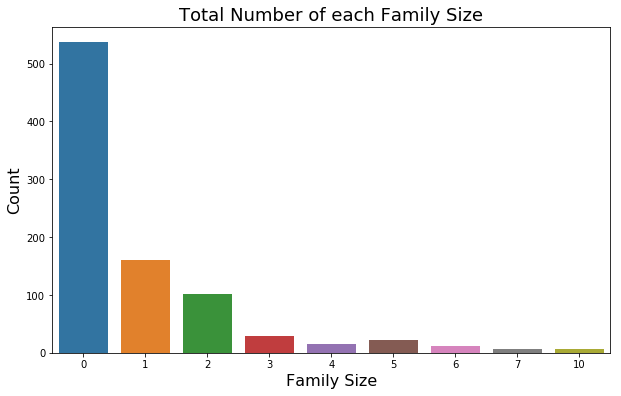

In [108]:
Family = titanic_data[["FamilyAbroad", "Survived"]].groupby(['FamilyAbroad'],as_index=False).count()
Family["Percentage"] = Family["Survived"]/891 * 100
Family.columns = (['FamilyAbroad','Count','Percentage'])
display(Family)
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='FamilyAbroad', data=titanic_data)
plot.set_title("Total Number of each Family Size",fontsize= 18)
plt.xlabel('Family Size',fontsize= 16)
plt.ylabel('Count',fontsize= 16)

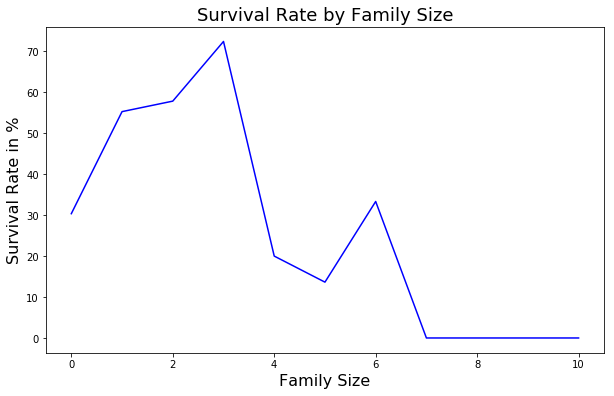

In [109]:
## making a grouped dataframe by FamilyAroad field
travelled_with_family_grouped = titanic_data.groupby(['FamilyAbroad'],as_index=False)

#plotting the line graph (x= Size of Family and y=Survivial Rate)
plt.figure(figsize=(10, 6))
plt.plot(travelled_with_family_grouped.mean()['FamilyAbroad'],travelled_with_family_grouped.mean()['Survived']*100,c='b')

#setting up labels and title
plt.title('Survival Rate by Family Size',fontsize = 18)
plt.xlabel('Family Size',fontsize = 16)
plt.ylabel('Survival Rate in %',fontsize = 16)



Family size of 2 - 3 members had higher surviviability rate, we can probably assume that small family groups would manage/communicate better during chaotic events, but that is not always the case.

The dataset has three embarkment locations (C = Cherbourg, Q = Queenstown, S = Southampton), the next visualizations give us an insightful view of the age distribuation from each embarkment, as well as the survival rate.

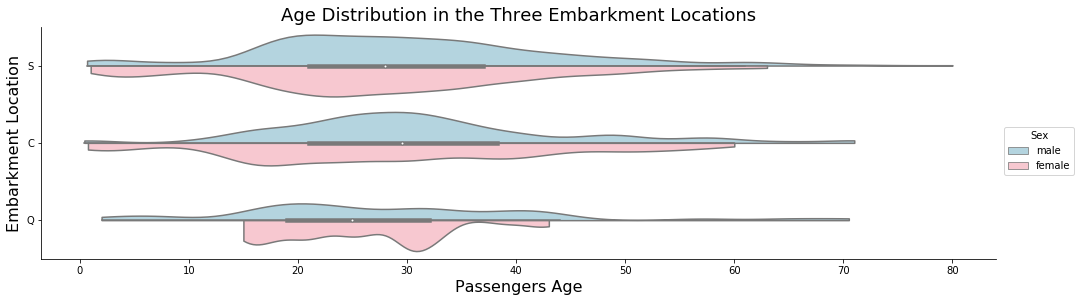

In [110]:
#plot a factorplot to show the age distribuation from each embarkment point
embarked_grouped = titanic_data[['Embarked','Sex','Age']]
#define the palette for both sex 
gender_color = {}
for sex in embarked_grouped.Sex.unique():
    if sex == 'male':
        gender_color[sex] = "lightblue"
    else:
        gender_color[sex] = "pink"
#plotting and placing title alongwith labels
p=sns.factorplot('Age','Embarked', data=embarked_grouped ,hue='Sex', palette =gender_color,size=4,aspect=3.5,kind='violin',split=True, cut=0, bw=.2)
p.set_xlabels('Passengers Age', fontsize=16)
p.set_ylabels('Embarkment Location', fontsize=16)
title('Age Distribution in the Three Embarkment Locations',fontsize=18)


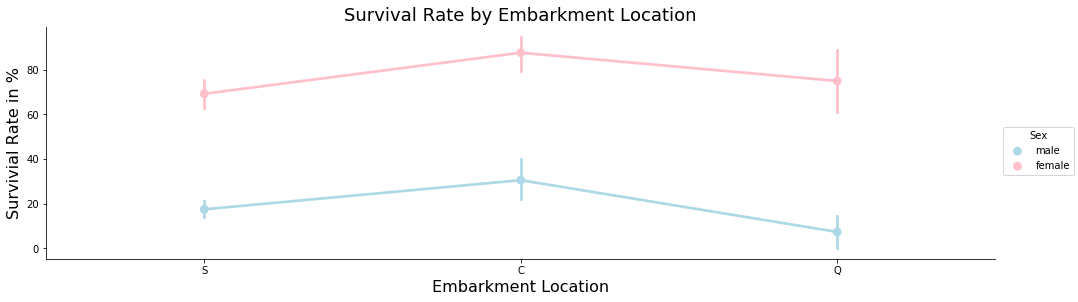

In [111]:
#plot a factorplot to show the mean survival in each embarkment point
embarked_grouped = titanic_data[['Survived','Embarked','Sex']]
#muliply the Survived field by 100 to reflect % in the gragh below
embarked_grouped.loc[:,'Survived'] *= 100  
#plotting the factorplot and placing title alongwith labels
p=sns.factorplot('Embarked','Survived', data=embarked_grouped ,palette =gender_color,hue='Sex',size=4,aspect=3.5,bw=.2)
p.set_xlabels('Embarkment Location', fontsize=16)
p.set_ylabels('Survivial Rate in %', fontsize=16)
title('Survival Rate by Embarkment Location',fontsize=18)

In [112]:
#see the actual total passengers embarked from each location
Embarked_by_total_passengers = titanic_data.groupby(['Embarked'], as_index=False).count()[['Embarked','PassengerId']]
Embarked_by_total_passengers.columns = ['Embarkment Location','Total Passengers']
Embarked_by_total_passengers

,Embarkment Location,Total Passengers
0,C,168
1,Q,77
2,S,646


Cherbourg had the least number of passengers, but had the highest mean of all in terms of survival rate. Since we do not know if there are any cabins that might be initially reserved for each embarkment point, we cannot point out any correlations nor significant patterns.

## Limitations 
We are not sure if the dataset we investiated in is an accurate representation of the entire popluation, especially the crew group was not included as it only contained passengers. 

The lack of sufficient cabin records had minimized the analysis to see if there is a correlation between passengers' survival rate and their cabins on the Titanic.
## Conclusion 
The introductory data analysis sheds the light on few areas that seek more investigations to confirm such correlations. Initially, passengers who survived had the following features:

1- being a child

2- and female,

3- and the ticket is a lower-class,

4- and checking-in from the Cherbourg embarkment.

However, these are tentative and must not be taken as definite causation.
